In [6]:
import pandas as pd
import zipfile

# Specify the path to the zip file
zip_file_path = 'C:/Users/samue/Downloads/archive (2).zip'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('extracted_files')

# List the files in the extracted directory
extracted_files = zip_ref.namelist()

# Assuming there's only one CSV file in the zip archive, get its name
csv_file_name = [file for file in extracted_files if file.endswith('.csv')][0]

# Read the CSV file
csv_file_path = f'extracted_files/{csv_file_name}'  # Path to the extracted CSV file
df = pd.read_csv(csv_file_path)

# Now you can work with the DataFrame 'df'
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [7]:
df.shape

(301, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [10]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.642584,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [11]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

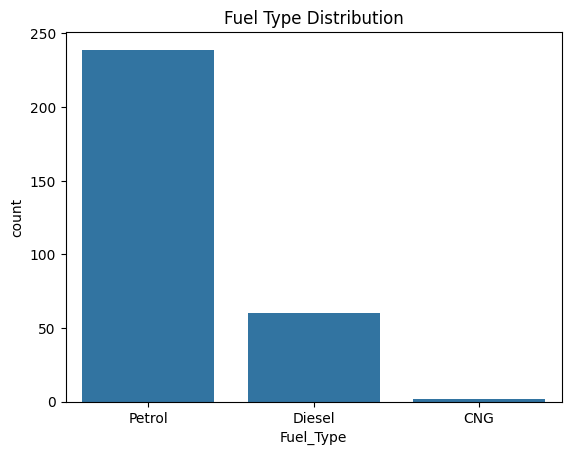

In [19]:
sns.countplot(x='Fuel_Type', data=df)
plt.title('Fuel Type Distribution')
plt.show()

In [20]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

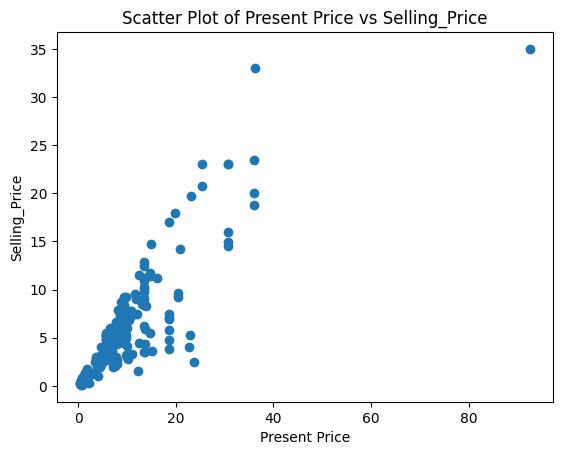

In [25]:
plt.scatter(df['Present_Price'], df['Selling_Price'])
plt.xlabel('Present Price')
plt.ylabel('Selling_Price')
plt.title('Scatter Plot of Present Price vs Selling_Price')
plt.show()


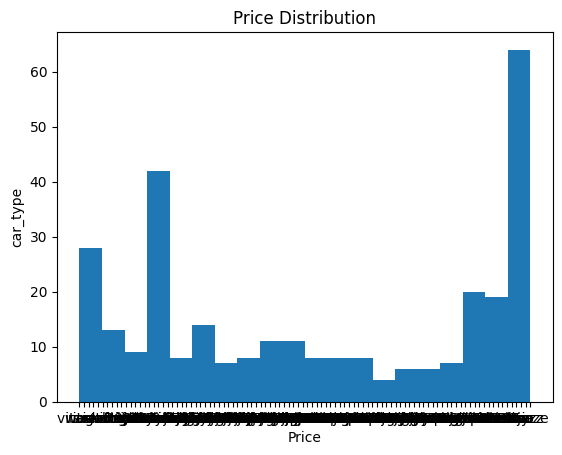

In [26]:
plt.hist(df['Car_Name'],bins=20 )
plt.xlabel('Price')
plt.ylabel('car_type')
plt.title('Price Distribution')
plt.show()

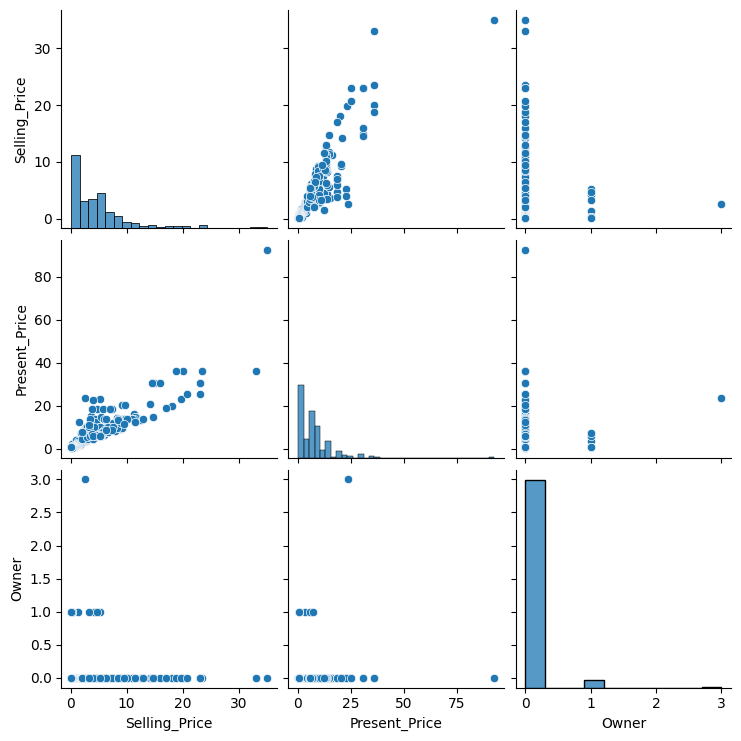

In [28]:
sns.pairplot(df[['Car_Name','Selling_Price','Present_Price','Fuel_Type','Transmission','Owner']])
plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder object
le = LabelEncoder()

# Select columns with object data type (categorical variables)
var_mod = df.select_dtypes(include='object').columns

# Label encode each categorical variable
for i in var_mod:
    df[i] = le.fit_transform(df[i])


In [31]:
x = df.drop(['Present_Price'],axis=1)
y = df['Present_Price']

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 42)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [36]:
# Define new car features (considering only the first 8 features used during training)
new_car_features = [4000, 0, 2, 3, 0, 96.0, 172.0, 65.4]

# Reshape the features array to match the expected input format of the model (if needed)
new_car_features = [new_car_features]  # Convert to 2D array if necessary

# Predict the price of the new car
new_car_price = model.predict(new_car_features)

# Print the predicted price
print('Predicted Price:', new_car_price[0])


Predicted Price: 1710.5467663809532


C:\Users\samue\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
